# TIME SERIES FORECASTING

**so here 'month data'  is in string so we have to convert to valid  date format**

**converting to date format**

In [0]:
import pandas as pd
from pandas import datetime
def parser(x):
  return datetime.strptime(x,'%Y-%m')
data = pd.read_csv('sales-cars.csv', index_col = [0],parse_dates = [0],date_parser = parser)

In [7]:
print(data.tail())

            Sales
Month            
2018-08-01    408
2018-09-01    490
2018-10-01    420
2018-11-01    520
2018-12-01    480


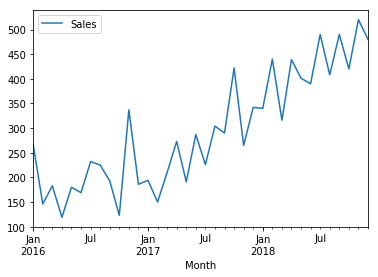

In [8]:
import  matplotlib.pyplot as plt
data.plot()

**above graph is not stationary so convert it**

In [9]:
data.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [10]:
data_diff = data.diff(periods=1)
data_diff = data_diff[1:]
data_diff

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0
2016-07-01,63.0
2016-08-01,-7.0
2016-09-01,-32.0
2016-10-01,-70.0


**we saw series to be non stationary below  from graph but wgat if we can to do  it by other way**

In [0]:
from statsmodels.graphics.tsaplots import plot_acf

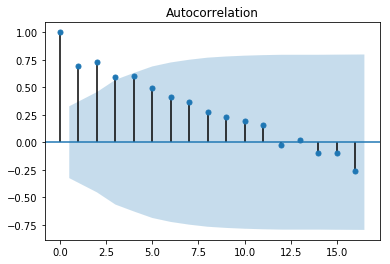

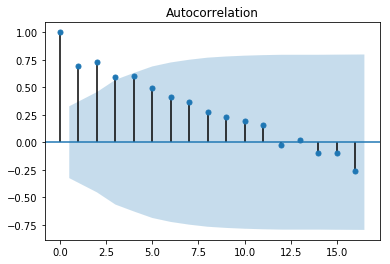

In [12]:
#stationary
plot_acf(data)


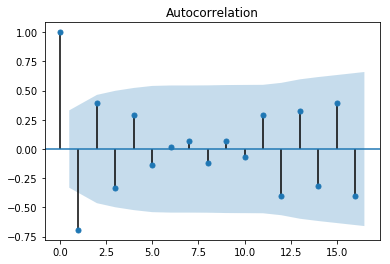

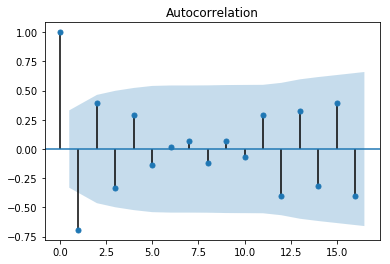

In [13]:
#nonstationary
plot_acf(data_diff)

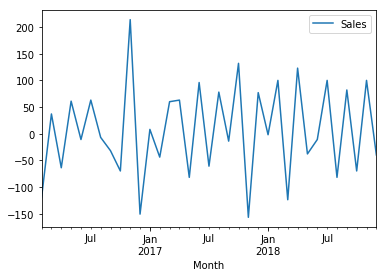

In [14]:
data_diff.plot()

# Applying AR MODEL

In [0]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics  import mean_squared_error
X = data.values
train = X[0:27]
test = X[26:]
predictions = []
model_ar = AR(train)
model_ar_fit  = model_ar.fit()

In [0]:
predictions = model_ar_fit.predict(start = 26,end = 36)

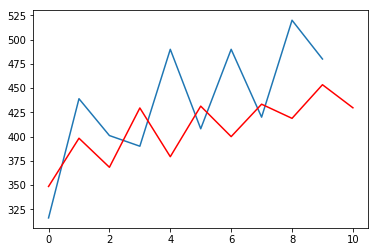

In [17]:
plt.plot(test)
plt.plot(predictions,color = 'red')

# ARIMA



In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [0]:
#p,d,q
#p = months backward to be taken in to consideration while training
#d = order of integration
#q = moving average
model_arima = ARIMA(train,order = (3,1,2))
model_arima_fit = model_arima.fit()

In [27]:
predictions = model_arima_fit.forecast(steps = 10)[0]
predictions

array([383.93155761, 332.47747538, 419.91250998, 389.1778246 ,
       409.21397459, 373.91765096, 413.84902753, 423.08210179,
       443.4778941 , 422.17597048])

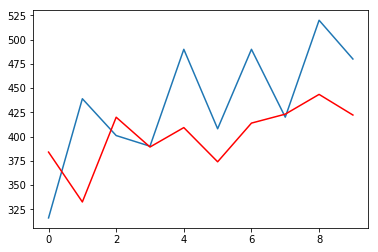

In [28]:
plt.plot(test)
plt.plot(predictions,color = 'red')

In [29]:
print(model_arima_fit.aic)
mean_squared_error(test,predictions)

292.6686238693915


3901.581323648528

In [30]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [31]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.72448093894775
(0, 0, 2) 315.25060028728575
(0, 0, 3) nan
(0, 0, 4) 310.1669328576465
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.08415381062906
(0, 1, 2) 296.322922690801
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.10194741083694
(1, 0, 0) 316.16687175281163
(1, 0, 1) 313.0487174416236
(1, 0, 2) 310.97906422274696
(1, 0, 4) 309.67799311500164
(1, 1, 0) 298.8325442271119
(1, 1, 1) 297.1256511258501
(1, 1, 2) 299.47166670626996
(1, 1, 3) 301.2851180947824
(1, 1, 4) 299.97873239707604
(1, 2, 0) 306.53077675711666
(1, 2, 3) nan
(2, 0, 0) 310.996957361264
(2, 0, 1) 340.65530357675436
(2, 0, 4) 331.45166724402554
(2, 1, 0) 300.2089561240708
(2, 1, 1) 297.9999930167344
(2, 1, 2) 298.5505428130323
(2, 1, 3) 302.8720828709347
(2, 2, 0) 306.2975856431769
(2, 2, 3) nan
(3, 0, 0) 312.9838587456852
(3, 0, 1) 339.8412953038119
(3, 0, 4) nan
(3, 1, 0) 294.85435842190464
(3, 1, 1) 295.99793534185574
(3, 1, 2) 292.6686238693915
(3, 1, 3) 294.65889075177313
(3, 2,